## 目的関数の最適化

## ロジスティック回帰の尤度関数

In [3]:
import numpy as np
def logit(x,w):
    return 1/(1+np.exp(-x+w))

与えられたデータが$x=0,2,3,5,6,7,9$でそれぞれの分類が$y=0,0,0,1,0,1,1$の場合の尤度関数を計算する。

In [4]:
(1-logit(0,0))*(1-logit(2,0))*(1-logit(3,0))*logit(5,0)*(1-logit(6,0))*logit(7,0)*logit(9,0)

6.9352847482798534e-06

In [5]:
def liklihood(w):
    return (1-logit(0,w))*(1-logit(2,w))*(1-logit(3,w))*logit(5,w)*(1-logit(6,w))*logit(7,w)*logit(9,w)

In [6]:
for w in range(10):
    print(str(w)+':'+str(liklihood(w)))

0:6.93528474828e-06
1:0.000153604759101
2:0.00201386206814
3:0.0142480219087
4:0.05213952268
5:0.0969347198627
6:0.0873815714263
7:0.037401606048
8:0.00813511682479
9:0.0010175850826


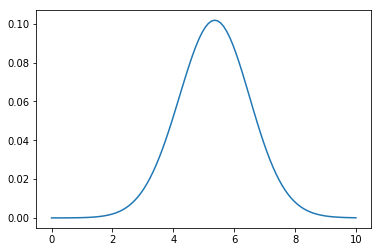

In [7]:
import matplotlib.pyplot as plt
x=np.linspace(0,10,100)
y=[liklihood(w) for w in x]
plt.plot(x,y)
plt.show()

与えられたデータが$x=150,160,165,170$でそれぞれの分類が$y=0,0,1,1$の場合の尤度関数を計算する。

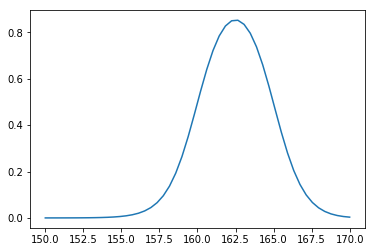

In [8]:
def liklihood(w):
    return (1-logit(150,w))*(1-logit(160,w))*logit(165,w)*logit(170,w)
w=np.linspace(150,170)
l=liklihood(w)
plt.plot(w,l)
plt.show()

### Newton法
$f(x)=0$の解を求めよう。
$f'(x)$が接線の傾きであったことを思い出す。
まず適当な$x_0$で$f(x_0)$の値を計算する。
$(x_0,f(x_0))$から接線を引いて、$x$軸との交点を求めて$x_1$とする。
接線の式$y=f'(x_0)(x-x_0)+f(x_0)$となり、これと$y=0$の交点は$x=x_0-\dfrac{f(x_0)}{f'(x_0)}$である。
これを$x_2, x_3,\ldots$と同じように$x_{n+1}=x_n-\dfrac{f(x_n)}{f'(x_n)}$という式に従って更新していく。
これを繰り返すと$f(x)=0$の解に近づく。

$x^2=2$の解を上の方法で求めるコードを書こう。

In [9]:
def f(x):
    return x**2-2

def df(x):
    return 2*x

x=2
for n in range(10):
    x=x-f(x)/df(x)
    print(x)

1.5
1.4166666666666667
1.4142156862745099
1.4142135623746899
1.4142135623730951
1.414213562373095
1.4142135623730951
1.414213562373095
1.4142135623730951
1.414213562373095


$x^3=5$となる$x$の近似値を上と同じ方法で求めよう。

In [10]:
def f(x):
    return x**3-5

def df(x):
    return 3*x**2

x=2
for n in range(10):
    x=x-f(x)/df(x)
    print(x)

1.75
1.7108843537414966
1.7099764289169748
1.709975946676833
1.709975946676697
1.709975946676697
1.709975946676697
1.709975946676697
1.709975946676697
1.709975946676697


### 勾配

関数$f(x,y)$の値が$(x,y)$を変化させた時に最も変化する方向を求める。
$$
grad~f=\begin{pmatrix}\frac{\partial f}{\partial x}\\ \frac{\partial f}{\partial y}\end{pmatrix}
$$
を計算すればよい。
これを$f$の勾配という。

例えば$y=f(x)$の場合、どのようになるか。
法線の方向は$(f'(x),-1)$で$x$を正の方向に動かすか負の方向に動かすか。
$f'(x)>0$なら$x$を増加させると$f(x)$も増加する。
$f'(x)<0$なら$x$を増加させると$f(x)$は減少する。

### 勾配法
$f(x,y)$の最小値、最大値を求めたい。
勾配$grad~f$の向きに少しづつ更新していく。
初期値$(x_0,y_0)$とし、$(x_1,y_1)=(x_0,y_0)+\lambda grad(f)(x_0,y_0)$と更新する。
$\lambda$は適当なパラメータを設定しておく。

ニュートン法と同様に初期値によっては収束しなかったり、局所最適にしかならなかったりする。

$f(x)=x^2+x$の最小値を求めよう。

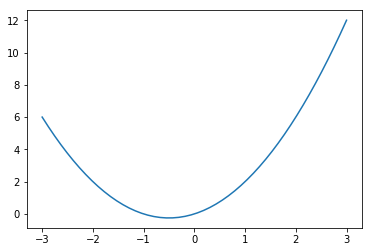

In [11]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**2+x

x=np.linspace(-3,3)
y=[f(z) for z in x]
plt.plot(x,y)
plt.show()

[1, 0.10000000000000009, -0.25999999999999995, -0.40399999999999997, -0.4616, -0.48464, -0.493856, -0.4975424, -0.49901696, -0.499606784, -0.4998427136]


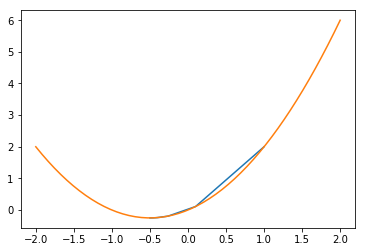

In [12]:
def df(x):
    return 2*x+1
l=.3
x=[1]
for n in range(10):
    x.append(x[n]-l*df(x[n]))
x

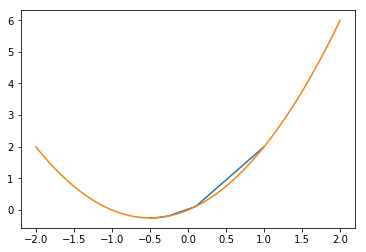

In [7]:
plt.plot(x,[f(i) for i in x])

print(x)

x=np.linspace(-2,2)
y=[f(z) for z in x]
plt.plot(x,y)
plt.show()

$f(x)=x^4-7x^2+2x$の最小値を勾配法で求めよう。

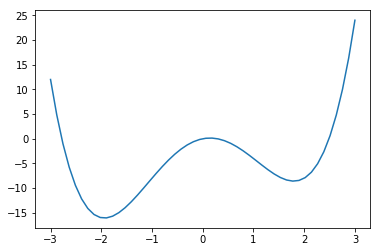

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def f(x):
    return x**4-7*x**2+2*x

x=np.linspace(-3,3)
y=[f(z) for z in x]
plt.plot(x,y)

[3, -0.40000000000000036, -0.7672000000000005, -1.3139258543104009, -1.8800013309841157, -1.9670650401328433, -1.921759962995749, -1.9475180111648216, -1.9334610720513639, -1.941323254119929, -1.9369825738513102]


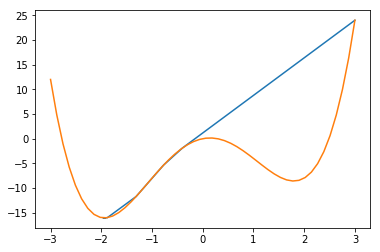

In [20]:
def df(x):
    return 4*x**3-14*x+2
l=.05
x=[3]

for n in range(10):
    x.append(x[n]-l*df(x[n]))

print(x)
    
plt.plot(x,[f(i) for i in x])
xx=np.linspace(-3,3)
y=[f(z) for z in xx]
plt.plot(xx,y)
plt.show()

初期値や$l$を変化させて何が起こるか観察してみよう。

$f(x,y)=x^2+y^2$の最小値を勾配法で求めよう。

In [43]:
x=np.linspace(-3,3)
y=np.linspace(-3,3)

import itertools
a = [x, y]
x_y = list(itertools.product(*a))
x_y = [list(i) for i in x_y]
print(x_y[:, 0])

TypeError: list indices must be integers or slices, not tuple

[ 0.6  0.6]
0.72
[ 0.36  0.36]
0.2592
[ 0.216  0.216]
0.093312
[ 0.1296  0.1296]
0.03359232
[ 0.07776  0.07776]
0.0120932352
[ 0.046656  0.046656]
0.004353564672
[ 0.0279936  0.0279936]
0.00156728328192
[ 0.01679616  0.01679616]
0.000564221981491
[ 0.0100777  0.0100777]
0.000203119913337
[ 0.00604662  0.00604662]
7.31231688013e-05


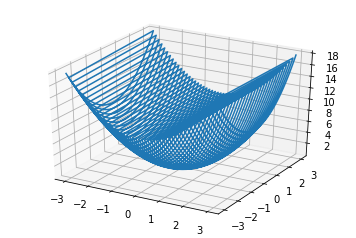

In [47]:
from mpl_toolkits.mplot3d import Axes3D

def f(x,y):
    return x**2+y**2

def gradf(x):
    return 2*x

n=10
x=np.array([1,1])
l=.2
for i in range(n):
    x=x-l*gradf(x)
    print(x)
    print(f(x[0],x[1]))

    
x=np.linspace(-3,3)
y=np.linspace(-3,3)

import itertools
a = [x, y]
x_y = list(itertools.product(*a))
x_y = [list(i) for i in x_y]
x_y = np.array(x_y)

z=[f(i[0], i[1]) for i in x_y]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
# X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(x_y[:, 0], x_y[:, 1], z, rstride=10, cstride=10)

plt.show()

3Dプロット？

### ロジスティック回帰

ここでは2クラス分類する場合を考える。
説明変数$x=(x_1,\ldots,x_k)$で与えられたデータをクラスaまたはクラスbの二つに分類する。
クラスを表す変数を
$$
y=\begin{cases}1&\mbox{クラスa}\\
0&\mbox{クラスb}\end{cases}
$$
とする。
するとデータ$x$がクラス$y$となる確率を$P(a\mid X=x)^{y}P(b\mid X=x)^{1-y}$と表すことができる。
記述を単純化するため$x=(x_0=1,x_1,\ldots,x_k)$としておく。
ロジスティック回帰のモデルは、パラメータ$w=(w_0,\ldots,w_k)$を使って、クラスaになる確率を
$$P(a\mid X=x)=\frac{1}{1+\exp(-w^Tx)}$$とするもの。
このとき、
$$P(b\mid X=x)=1-\frac{1}{1+\exp(-w^Tx)}=\frac{\exp(-w^Tx)}{1+\exp(-w^Tx)}$$
となる。


クラスラベルが$1,\ldots,m$の多クラス分類の場合、パラメータを$w_1,\ldots,w_m$として、確率を表すモデルを
$P(G=k\mid X=x)=\dfrac{\exp(w_k^Tx)}{\sum_l\exp(w_l^Tx)}$とする。

$f(x)=\dfrac{1}{1+\exp(-x)}$のグラフ

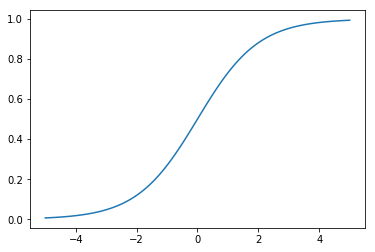

In [14]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
import matplotlib.pyplot as plt
x=np.linspace(-5,5,100)
y=[sigmoid(i) for i in x]
plt.plot(x,y)
plt.show()

尤度関数を計算しよう。
$$
P(a\mid X=x)^yP(b\mid X=x)^{1-y}=(\frac{1}{1+\exp(-w^Tx)})^{y}(\frac{\exp(-w^Tx)}{1+\exp(-w^Tx)})^{1-y}\\
=\frac{\exp(-w^Tx)^{1-y}}{1+\exp(-w^Tx)}=\frac{\exp(-(1-y)w^Tx)}{1+\exp(-w^Tx)}\\
=\frac{1}{1+\exp((-1)^yw^Tx)}
$$
であるので、

$$
L(w_0,w_1,\ldots,w_k)=\prod_{i=1}^NP(a\mid X=x^{(i)})^{y^{(i)}}P(b\mid X=x^{(i)})^{1-y^{(i)}}\\
=\prod_{i=1}^N\frac{1}{1+\exp((-1)^{y^{(i)}}w^Tx^{(i)})}
$$
と計算できる。

ここで計算しやすいように対数尤度関数$l(w)=\log L(w)$を考えると、
$$
l(w_0,\ldots,w_k)=-\sum_{i=1}^N\log(1+\exp((-1)^{y^{(i)}}w^Tx^{(i)})
$$
と計算できる。

最尤推定でパラメータを決めることにすると、$l(w_0,\ldots,w_k)$を最も大きくするパラメータ$w$を探す。

### 勾配法と確率勾配法

勾配法でこれを求めることにしよう。
そのために$grad(l(w))$を計算しよう。

$$
(\log(1+\exp(aw+b)))'=\frac{a\exp(aw+b)}{1+\exp(aw+b)}
$$
となることを使えば
$$
grad(l(w))=-\sum_{i=1}^N\dfrac{(-1)^{y^{(i)}}\exp((-1)^{y^{(i)}}w^Tx)}{1+\exp((-1)^{y^{(i)}}w^Tx)}x^{(i)}
$$
となる。

これを用いて勾配法により尤度関数$l(w)$を最適化する。
全てのデータを使って更新するのではなく、一部のデータを用いて更新するのが確率勾配法。

### 正則化

損失関数を
$$
\min_{w,c}\frac{1}{2}w^Tw+C\sum^n_{i=1}\log(\exp(-y_i(X_i^Tw+c))+1)
$$
としたのが$L2$正則化という。

$$
\min_{w,c}\vert\vert w\vert\vert_1+C\sum^n_{i=1}\log(\exp(-y_i(X_i^Tw+c))+1)
$$
としたのが$L1$正則化という。
とする。

第一項を正則化項という。
これがパラメータ$w$の大きさを抑える効果がある。
特に$L1$正則化ではパラメータが$0$になりやすい傾向がある。